In [ ]:
!pip install --upgrade pandas-datareader

!pip install --upgrade pandas

In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing dataset

In [ ]:
congress_file = pd.read_csv('/content/drive/MyDrive/dev/DS/all_transactions.csv')

In [ ]:
congress_file.head()

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd
0,2021,10/04/2021,2021-09-27,joint,BP,BP plc,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
1,2021,10/04/2021,2021-09-13,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
2,2021,10/04/2021,2021-09-10,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
3,2021,10/04/2021,2021-09-28,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
4,2021,10/04/2021,2021-09-17,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Hon. Alan S. Lowenthal,CA47,https://disclosures-clerk.house.gov/public_dis...,False


We only keep these below

In [ ]:
strat = congress_file[['disclosure_date', 'transaction_date', 'ticker', 'asset_description', 'type', 'representative']]

# Editing date types and sorting by ascending order

In [ ]:
strat['disclosure_date'] = pd.to_datetime(strat['disclosure_date'], errors='coerce')
strat['transaction_date'] = pd.to_datetime(strat['transaction_date'], errors='coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
strat

,disclosure_date,transaction_date,ticker,asset_description,type,representative
0,2021-10-04,2021-09-27,BP,BP plc,purchase,Hon. Virginia Foxx
1,2021-10-04,2021-09-13,XOM,Exxon Mobil Corporation,purchase,Hon. Virginia Foxx
2,2021-10-04,2021-09-10,ILPT,Industrial Logistics Properties Trust - Common...,purchase,Hon. Virginia Foxx
3,2021-10-04,2021-09-28,PM,Phillip Morris International Inc,purchase,Hon. Virginia Foxx
4,2021-10-04,2021-09-17,BLK,BlackRock Inc,sale_partial,Hon. Alan S. Lowenthal
...,...,...,...,...,...,...
14175,2020-06-10,2020-04-09,SWK,"Stanley Black & Decker, Inc.",sale_partial,Hon. Ed Perlmutter
14176,2020-06-10,2020-04-09,USB,U.S. Bancorp,sale_partial,Hon. Ed Perlmutter
14177,2020-06-10,2020-03-13,BMY,Bristol-Myers Squibb Company,sale_full,Hon. Nicholas Van Taylor
14178,2020-06-10,2020-03-13,LLY,Eli Lilly and Company,sale_full,Hon. Nicholas Van Taylor


Changing types

In [ ]:
strat['type'] = np.where(strat['type'] == 'purchase', 'LONG', 'SHORT')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Deleting missing tickers

In [ ]:
strat.drop(strat[strat.ticker == '--'].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#Strategy tracking congress member portfolio

In [ ]:
honorables_list = list(set(strat['representative']))
honorables_list

['Hon. Lori Trahan',
 'Hon. Sean Patrick Maloney',
 'Hon. Susan W. Brooks',
 'Hon. Gerald E. Connolly',
 'Hon. Austin Scott',
 'Hon. Mike Kelly',
 'Hon. Doug Lamborn',
 'Hon. Tom Malinowski',
 'Hon. David Madison Cawthorn',
 'Hon. Rohit Khanna',
 'Hon. Michael John Gallagher',
 'Hon. Bradley S. Schneider',
 'Hon. James M. Costa',
 'Hon. Dean Phillips',
 'Hon. Judy Chu',
 'Hon. Kathy Castor',
 'Hon. Mo Brooks',
 'Hon. Linda T. Sanchez',
 'Hon. Cindy Axne',
 'Hon. Aston Donald McEachin',
 'Hon. Debbie Dingell',
 'Hon. Steve Cohen',
 "Hon. Tom O'Halleran",
 'Hon. Hakeem S. Jeffries',
 'Hon. Harley E. Rouda',
 'Hon. Patrick T. McHenry',
 'Hon. Andrew Garbarino',
 'None Marie Newman',
 'Hon. Joseph P. Kennedy',
 'Hon. Lloyd K. Smucker',
 'Hon. Harold Dallas Rogers',
 'Hon. James French Hill',
 'Hon. Daniel Crenshaw',
 'Hon. Susie Lee',
 'None Deborah K. Ross',
 'Hon. Earl Leroy Carter',
 'Hon. Katherine M. Clark',
 'Hon. Tom Cole',
 'Hon. William R. Keating',
 'Hon. Lois Frankel',
 'None Sa

In [ ]:
congress_members = ['Hon. Virginia Foxx']
strat = strat[strat['representative'].isin(congress_members)]

In [ ]:
tickers = list(set(strat['ticker']))

In [ ]:
strat = strat.sort_values(by='transaction_date', ascending=True)

In [ ]:
start_date = str(strat['disclosure_date'].iloc[0])[:-8].rstrip()
end_date = str(strat['disclosure_date'].iloc[-1])[:-8].rstrip()

In [ ]:
data = pdr.get_data_yahoo(tickers, start=start_date, end=end_date)['Adj Close']

  

/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'CWEN.A', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'AAIC$B', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'BP PLC', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'TPCO', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'DUK$A', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [ ]:
data = data.dropna(axis=1).fillna('bfill')

In [ ]:
data

Symbols,EPD,AEG,HTGC,WMT,CVI,PPL,FLO,SIRE,R,NFG,...,ORI,KMI,PSXP,MFC,GLD,SO,SCHZ,MSFT,DUK,TSN
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-06,23.250498,4.157636,11.112940,113.468018,34.280945,31.383184,19.808805,15.787891,48.939953,42.025356,...,18.340059,18.319803,50.803814,17.648560,147.389999,57.175583,51.800373,156.639694,82.888397,85.364624
2020-01-07,23.266699,4.167042,11.105006,112.416748,34.811104,31.170542,19.892187,15.833206,49.340954,41.850704,...,18.159451,18.362846,51.860558,17.777761,147.970001,57.002621,51.752113,155.211456,82.368286,84.124168
2020-01-08,23.201889,4.214075,11.081211,112.030975,34.238190,31.347750,19.743950,15.733514,49.240700,41.381920,...,18.257963,18.216496,51.588371,17.958639,146.860001,56.984413,51.694202,157.683731,82.486923,84.644966
2020-01-09,23.137079,4.195262,11.112940,113.188316,34.605881,31.462925,20.031168,15.633819,48.967289,41.317574,...,18.397528,18.552242,51.556347,18.105064,146.029999,57.585213,51.713512,159.653641,82.687660,84.474510
2020-01-10,23.088470,4.148229,11.128802,112.243156,34.434864,31.400908,20.170145,15.679132,48.429592,41.299191,...,18.249754,18.517807,51.132046,18.208424,146.910004,57.949329,51.819679,158.914932,82.523422,87.040657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-01,24.192530,4.680000,17.210600,135.466064,17.010000,25.256392,27.092508,20.260000,77.690002,62.476131,...,25.730000,17.590000,41.099998,19.490000,181.619995,64.099998,52.290001,294.950012,99.830002,93.830002
2022-03-02,24.526491,4.850000,17.531475,135.635406,17.230000,25.524336,27.420000,20.500000,80.669998,63.906658,...,26.680000,18.139999,42.110001,20.010000,179.729996,64.570000,51.669998,300.190002,100.790001,95.040001
2022-03-03,24.595249,4.790000,17.453688,138.753342,17.150000,25.812130,27.650000,20.040001,80.349998,63.906658,...,26.790001,18.389999,41.450001,20.090000,180.800003,66.400002,51.849998,295.920013,102.639999,95.339996


In [ ]:
strat

,disclosure_date,transaction_date,ticker,asset_description,type,representative
6280,2020-01-06,2019-12-09,SO,Southern Company,LONG,Hon. Virginia Foxx
6279,2020-01-06,2019-12-17,DUK,Duke Energy Corporation,LONG,Hon. Virginia Foxx
6278,2020-01-06,2019-12-17,CWEN.A,"Clearway Energy, Inc. Class a",LONG,Hon. Virginia Foxx
6277,2020-01-06,2019-12-23,BP,BP p.l.c.,LONG,Hon. Virginia Foxx
4848,2020-02-03,2020-01-03,CVI,CVR Energy Inc.,LONG,Hon. Virginia Foxx
...,...,...,...,...,...,...
1840,2022-03-07,2022-02-24,FLO,Flowers Foods Inc,LONG,Hon. Virginia Foxx
1845,2022-03-07,2022-02-24,MSFT,Microsoft Corporation,SHORT,Hon. Virginia Foxx
1844,2022-03-07,2022-02-24,MFC,Manulife Financial Corporation,LONG,Hon. Virginia Foxx
1833,2022-03-07,2022-02-24,ADM,Archer-Daniels Midland Company,LONG,Hon. Virginia Foxx


In [ ]:
ptf = strat[['disclosure_date', 'ticker', 'type']]

In [ ]:
ptf

,disclosure_date,ticker,type
6280,2020-01-06,SO,LONG
6279,2020-01-06,DUK,LONG
6278,2020-01-06,CWEN.A,LONG
6277,2020-01-06,BP,LONG
4848,2020-02-03,CVI,LONG
...,...,...,...
1840,2022-03-07,FLO,LONG
1845,2022-03-07,MSFT,SHORT
1844,2022-03-07,MFC,LONG
1833,2022-03-07,ADM,LONG


In [ ]:
prices = []
for date,ticker in zip(ptf['disclosure_date'],ptf['ticker']):
  try:
   prices.append(data[data.index == date][ticker].iloc[0])
  except:
    prices.append(0)
    pass



In [ ]:
ptf['Prices'] = prices
ptf = ptf[ptf['Prices'] > 0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
ptf

,disclosure_date,ticker,type,Prices
6280,2020-01-06,SO,LONG,57.175583
6279,2020-01-06,DUK,LONG,82.888397
6277,2020-01-06,BP,LONG,34.776913
4848,2020-02-03,CVI,LONG,29.261509
4851,2020-02-03,PPL,LONG,32.118595
...,...,...,...,...
1840,2022-03-07,FLO,LONG,25.799999
1845,2022-03-07,MSFT,SHORT,278.910004
1844,2022-03-07,MFC,LONG,19.340000
1833,2022-03-07,ADM,LONG,83.970001


# PnL Calculation

In [ ]:
tickers = list(set(ptf['ticker']))
totals = []

# We perform pnl calculation. When theres no buy/short but there is a short/buy trade, we consider the price at end_date as reference calculation date
for tick in tickers:
  ptf_filtered = ptf[ptf['ticker']== tick]
  total_buy = ptf_filtered[ptf_filtered['type'] == 'LONG']['Prices'].mean()
  total_sell = ptf_filtered[ptf_filtered['type'] == 'SHORT']['Prices'].mean()
  if np.isnan(total_buy):
    total_buy = data[data.index == end_date][tick].iloc[0]
  elif np.isnan(total_sell):
    total_sell = data[data.index == end_date][tick].iloc[0]
  perf = ( (total_sell - total_buy) / total_buy) * 100
  totals.append([tick,perf])




Final PnL

In [ ]:
df_total = pd.DataFrame(totals, columns=['Ticker', 'Returns'])


In [ ]:
PnL = np.mean(list(set(df_total['Returns'])))

PnL Analysis - 3 Best vs 3 Worst

In [ ]:
top_perf = df_total.sort_values(by='Returns', ascending=False)['Ticker'][:3].tolist()
worst_perf = df_total.sort_values(by='Returns', ascending=True)['Ticker'][:3].tolist()

['NFG', 'XOM', 'OLP']

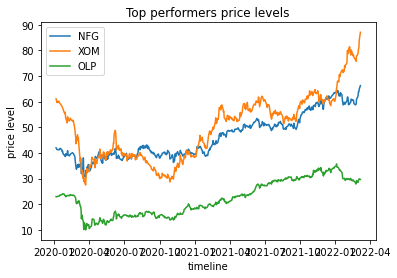

In [ ]:
# For top performers
for tick in top_perf:
  plt.plot(data[tick], label=tick)

plt.xlabel('timeline')
plt.ylabel('price level')
plt.title('Top performers price levels')
plt.legend()
plt.show()

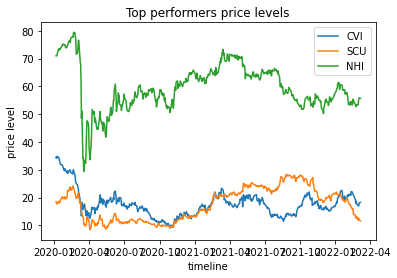

In [ ]:
# For worst performers
for tick in worst_perf:
  plt.plot(data[tick], label=tick)

plt.xlabel('timeline')
plt.ylabel('price level')
plt.title('Top performers price levels')
plt.legend()
plt.show()

Performance

In [ ]:
print(f'Average performance as of today is {round(PnL, 2)} % while replicating congress member(s) {congress_members} portfolio from {start_date} to {end_date}')

Average performance as of today is 4.33 % while replicating congress member(s) ['Hon. Virginia Foxx'] portfolio from 2020-01-06 to 2022-03-07
